In [103]:
import pandas as pd
import matplotlib.pyplot as plt
dF_stores=pd.read_csv('stores.csv')
dF_products=pd.read_csv('products.csv')
dF_customers=pd.read_csv('customers.csv')
dF_tickets=pd.read_csv('tickets.csv')

In [104]:
data = dF_customers.merge(dF_tickets, on="customerid", how = 'inner')

In [105]:
import datetime as dt

In [106]:
data['datekey']=pd.to_datetime(dF_tickets['datekey'],format="%Y-%m-%d")

In [107]:
data['weekday'] = data['datekey'].apply(lambda x: dt.datetime.strftime(x, '%A'))
data.head()
# dF_tickets['weekday'].value_counts()

,customerid,isocountrycode,regularstoreid,registrationdate,unregistrationdate,gender,age,zipcode,ticketid,linenumber,...,datekey,productid,quantity,extendedamount,originalamount,totaldiscount,itemdescription,storeid,storecity,weekday
0,77340000025940422,ES,ES0263,2017-11-25,NaN,F,39.0,50014,1000450762019032163010,1,...,2019-02-01,5706040,1.0,0.15,0.15,0.0,Bolsa papel grande,ES4507,Zaragoza,Friday
1,77340000025940422,ES,ES0263,2017-11-25,NaN,F,39.0,50014,1000450762019032163010,5,...,2019-02-01,5704173,1.0,1.69,1.69,0.0,Choco chip sin gl,ES4507,Zaragoza,Friday
2,77340000025940422,ES,ES0263,2017-11-25,NaN,F,39.0,50014,1000450762019032163010,4,...,2019-02-01,114904,1.0,1.99,1.99,0.0,Special Flakes,ES4507,Zaragoza,Friday
3,77340000025940422,ES,ES0263,2017-11-25,NaN,F,39.0,50014,1000450762019032163010,3,...,2019-02-01,70725,1.0,0.69,0.69,0.0,Caramelos,ES4507,Zaragoza,Friday
4,77340000025940422,ES,ES0263,2017-11-25,NaN,F,39.0,50014,1000450762019032163010,7,...,2019-02-01,4177,1.0,1.75,1.75,0.0,Colgate Herbal,ES4507,Zaragoza,Friday


## DÍAS DE LA SEMANA CON MÁS FRECUENCIA DE COMPRA

### Se observa que los días sábados hay mas ventas

#### No hay compras los días miércoles ni domingos

#### El día martes es el dia con menor ventas

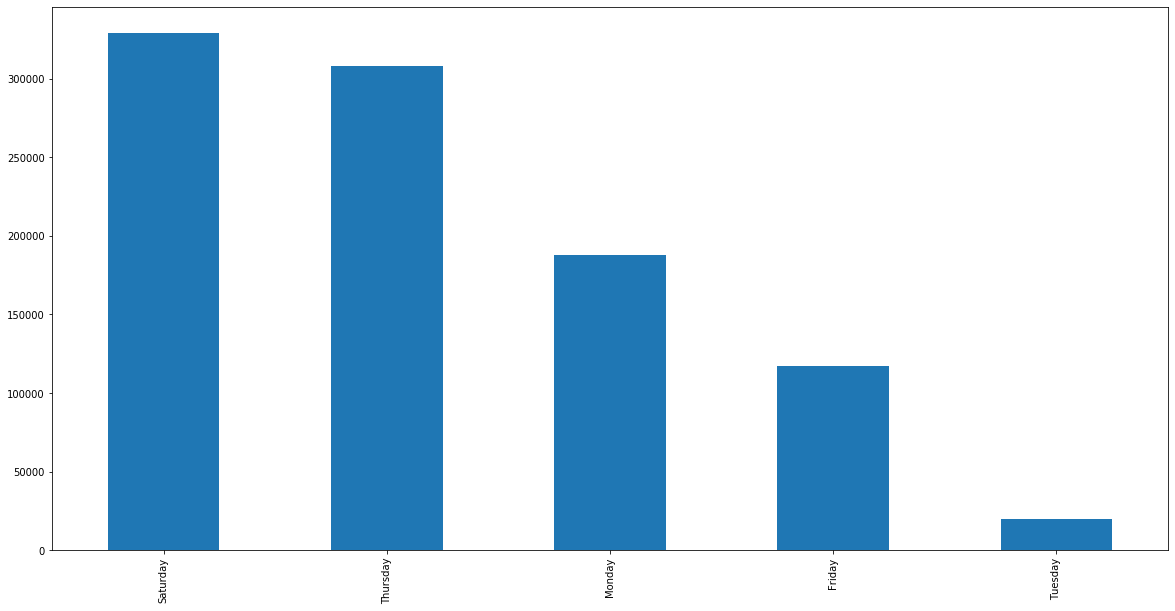

In [108]:
plt.rcParams['figure.figsize'] =[20, 10]
pd.value_counts(data['weekday']).plot.bar()

## GÉNEROS CON MÁS FRECUENCIA DE COMPRA POR DÍAS DE LA SEMANA

### Se puede observar que las mujeres realizan mas compras sin importar el día de la semana

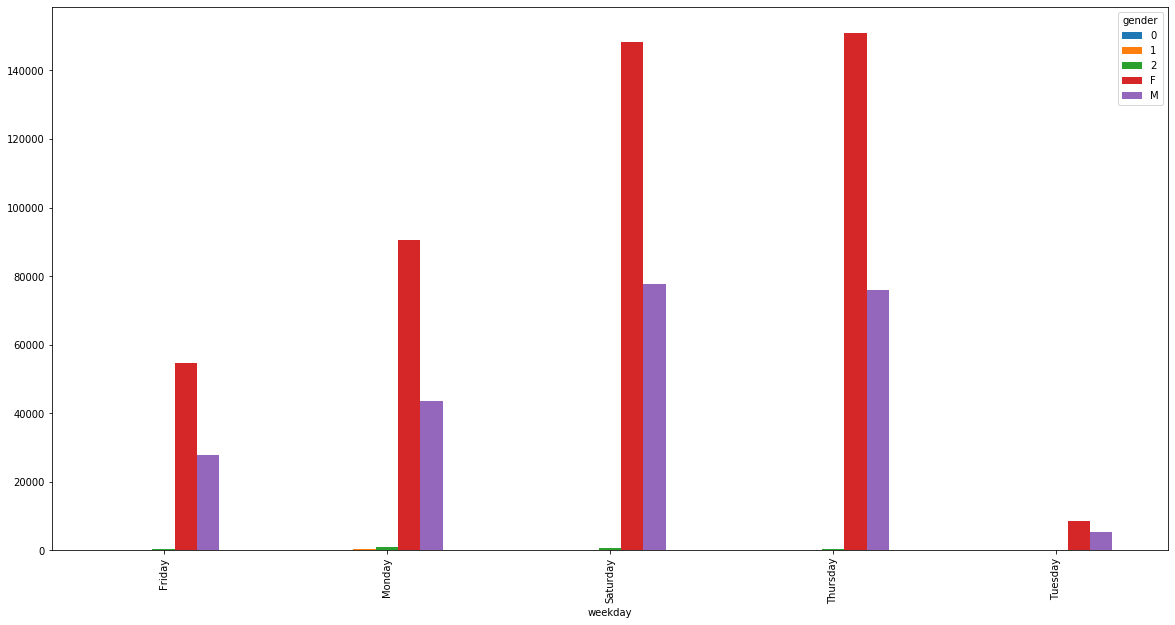

In [109]:
import seaborn as sns
data.groupby(['weekday','gender'])['customerid'].count().unstack().reset_index()\
.plot.bar(x = 'weekday', y = ['0', '1','2','F','M'])

## EDADES CON MÁS FRECUENCIA DE COMPRA POR DÍAS DE LA SEMANA

In [110]:
import numpy as np

#Sustituir rangos de edad por valores del 0 al 6
age = np.unique(data['age'])

def map_age(age):
    if ((age > 0) & (age <= 17)):
        return 0
    elif ((age > 18) & (age <= 25)):
        return 1
    elif ((age > 26) & (age <= 35)):
        return 2
    elif ((age > 36) & (age <= 45)):
        return 3
    elif ((age > 46) & (age <= 50)):
        return 4
    elif ((age > 51) & (age <= 55)):
        return 5
    elif ((age > 56) & (age <= 60)):
        return 6
    elif ((age > 61) & (age <= 65)):
        return 7
    elif ((age > 66) & (age <= 70)):
        return 8
    else:
        return 9
data['age'] = data['age'].apply(map_age)

### Se observa que las personas mayores a 70 años son las que más compran sin importar el día de la semana

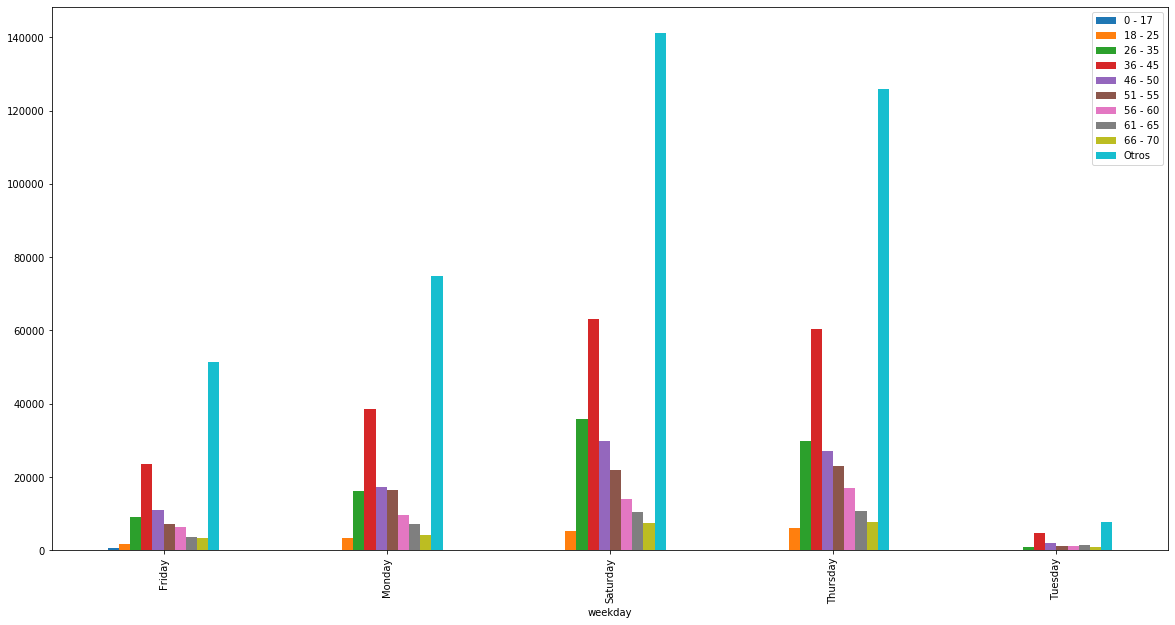

In [123]:
ax = data.groupby(['weekday','age'])['customerid'].count().unstack().reset_index()\
.plot.bar(x = 'weekday', y = [0,1,2,3,4,5,6,7,8,9])

ax.legend(["0 - 17", "18 - 25","26 - 35","36 - 45","46 - 50","51 - 55","56 - 60","61 - 65","66 - 70","Otros"]);

## PROMEDIO DE COMPRA POR GENERO Y POR DIA DE SEMANA

In [130]:
data['weekday'].value_counts()

Saturday    329236
Thursday    307860
Monday      187638
Friday      117456
Tuesday      20018
Name: weekday, dtype: int64

### Se observa que:
#### En promedio, los días lunes el genero "0" gasta más. 
#### En promedio, los días jueves el género "1" gasta más.
#### El resto de la semana el gasto promedio es igual sin importar el género.
### Los hombres gastan ligeramente más

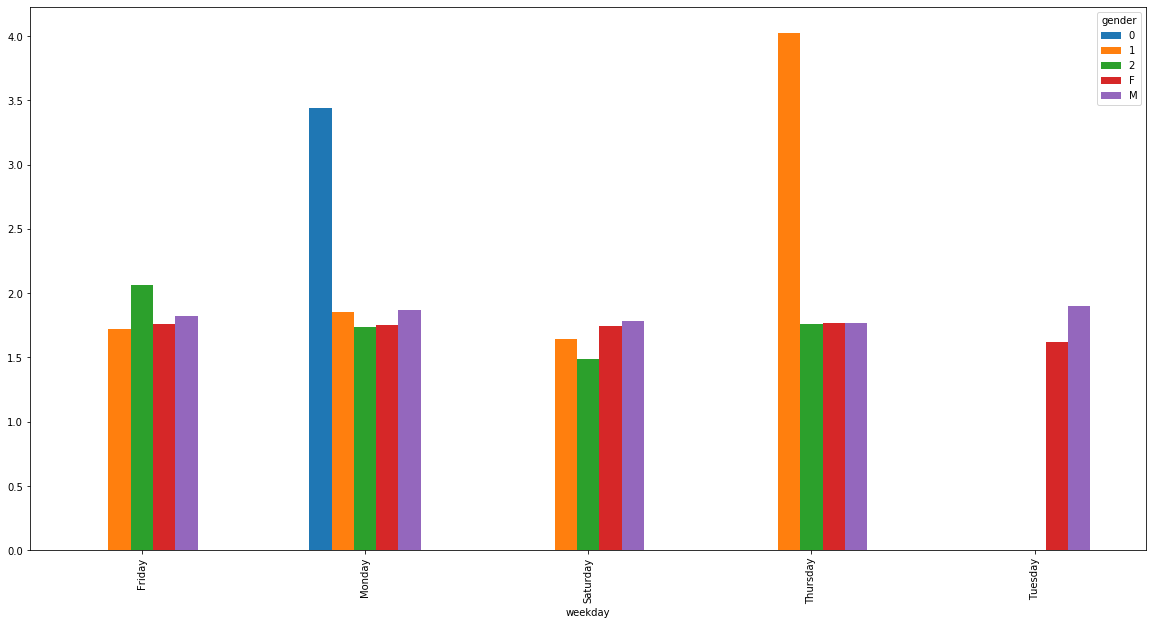

In [132]:
df = data.groupby(['weekday','gender'])['extendedamount'].mean().unstack().reset_index()\
.plot.bar(x = 'weekday', y = ['0', '1','2','F','M'])

## PROMEDIO DE COMPRA POR RANGO DE EDAD Y POR DIA DE SEMANA

### Se observa que:
#### El gasto promedio es igual sin importar el rango de edades ni el día de la semana.
#### Los días martes las personas entre 18 y 25 años gastan más.


### Si observamos los gráficos anteriores, las personas mayores a 70 años realizan más compras lo que no implica que gasten más.

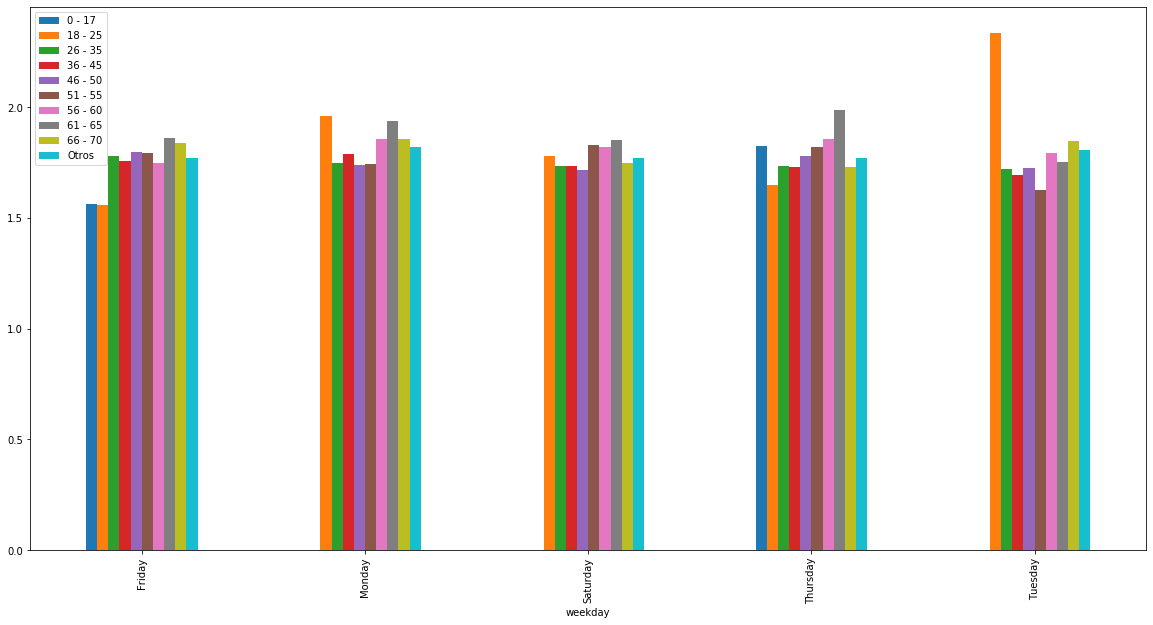

In [134]:
ax = data.groupby(['weekday','age'])['extendedamount'].mean().unstack().reset_index()\
.plot.bar(x = 'weekday', y = [0,1,2,3,4,5,6,7,8,9])

ax.legend(["0 - 17", "18 - 25","26 - 35","36 - 45","46 - 50","51 - 55","56 - 60","61 - 65","66 - 70","Otros"]);

## VENTAS POR TIENDA

### Se observa que la tienda ES4503 tiene meyor número de ventas
### Se obser que la tiene ES0263 es la que tiene menor número de ventas

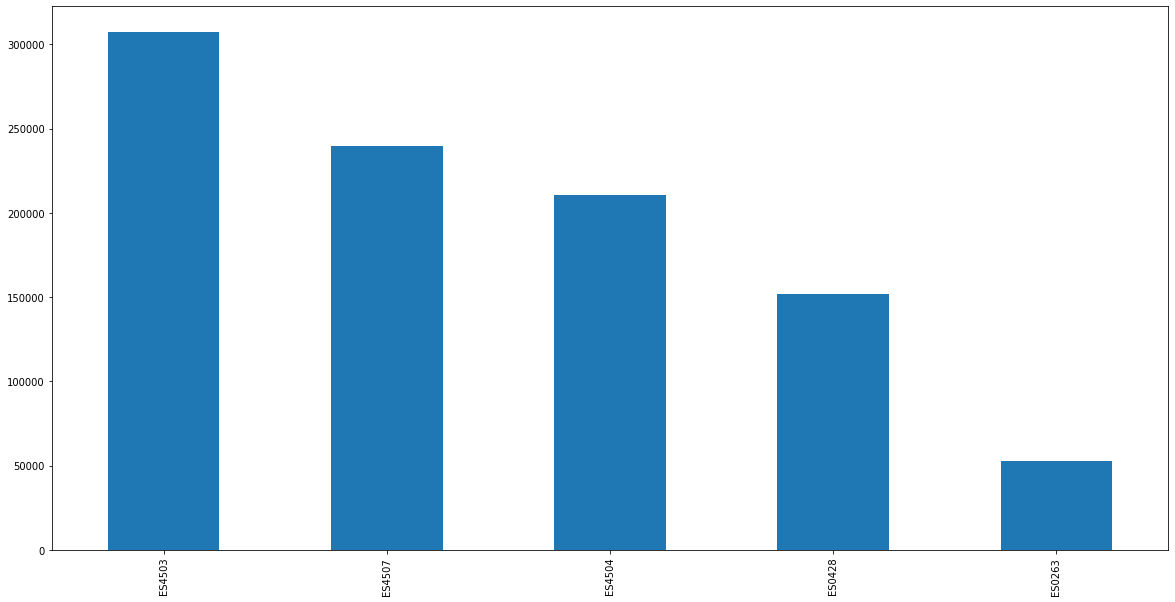

In [138]:
pd.value_counts(data['storeid']).plot.bar()

### GÉNERO CON MAS FRECUENCIA DE COMPRA POR TIENDA

### Se observa que las mujeres realizan más compras sin importar la tienda

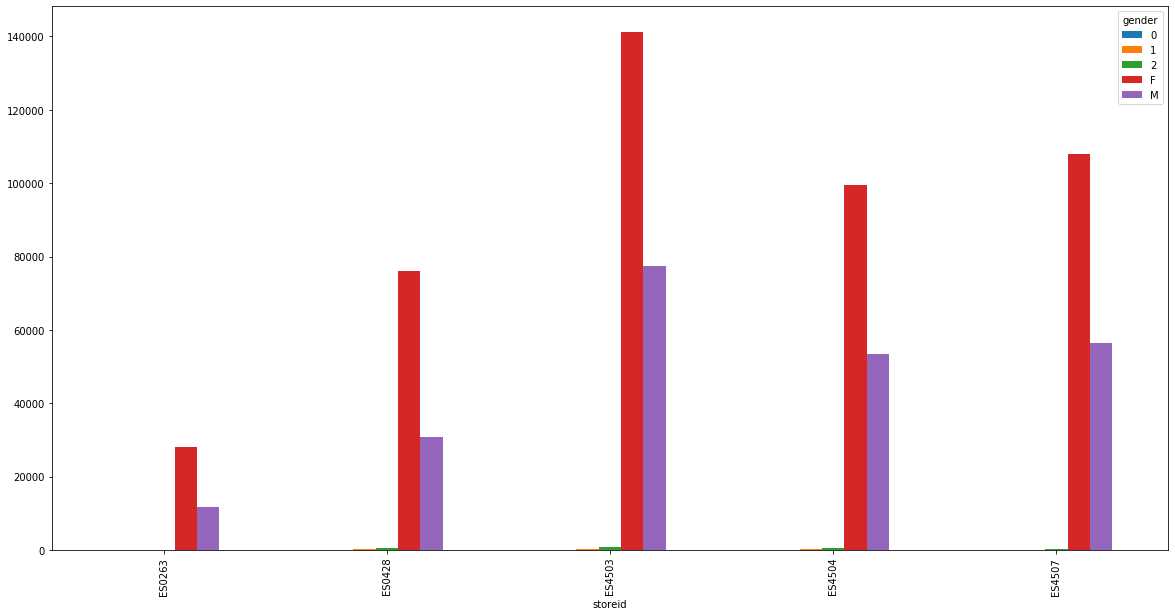

In [145]:
import seaborn as sns
data.groupby(['storeid','gender'])['customerid'].count().unstack().reset_index()\
.plot.bar(x = 'storeid', y = ['0', '1','2','F','M'])

## COMPRAS POR RANGO DE EDADES Y POR TIENDA

### Las personas mayores de 70 años realizan más compras sin importar la tienda

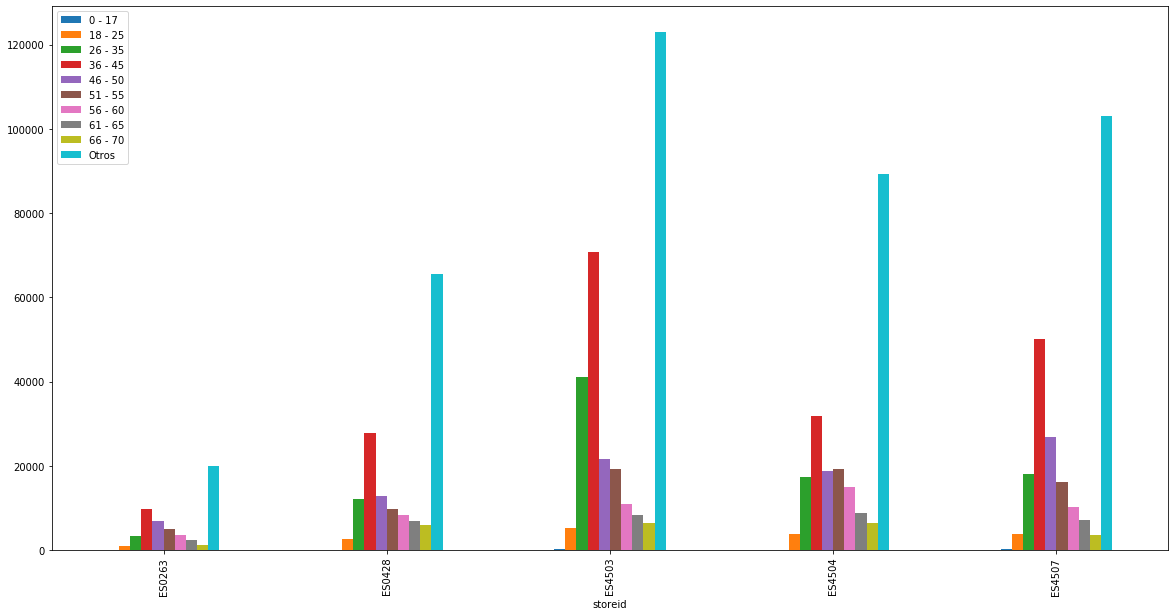

In [147]:
ax = data.groupby(['storeid','age'])['customerid'].count().unstack().reset_index()\
.plot.bar(x = 'storeid', y = [0,1,2,3,4,5,6,7,8,9])

ax.legend(["0 - 17", "18 - 25","26 - 35","36 - 45","46 - 50","51 - 55","56 - 60","61 - 65","66 - 70","Otros"]);

## PROMEDIO DE COMPRA POR TIENDA Y GÉNERO

### Se observa que: 
#### No hay mayor diferencia en el gasto promedio por género en cada tienda
#### En la tienda ES0263 el gasto del género "0" es mucho mayor que en otras tiendas

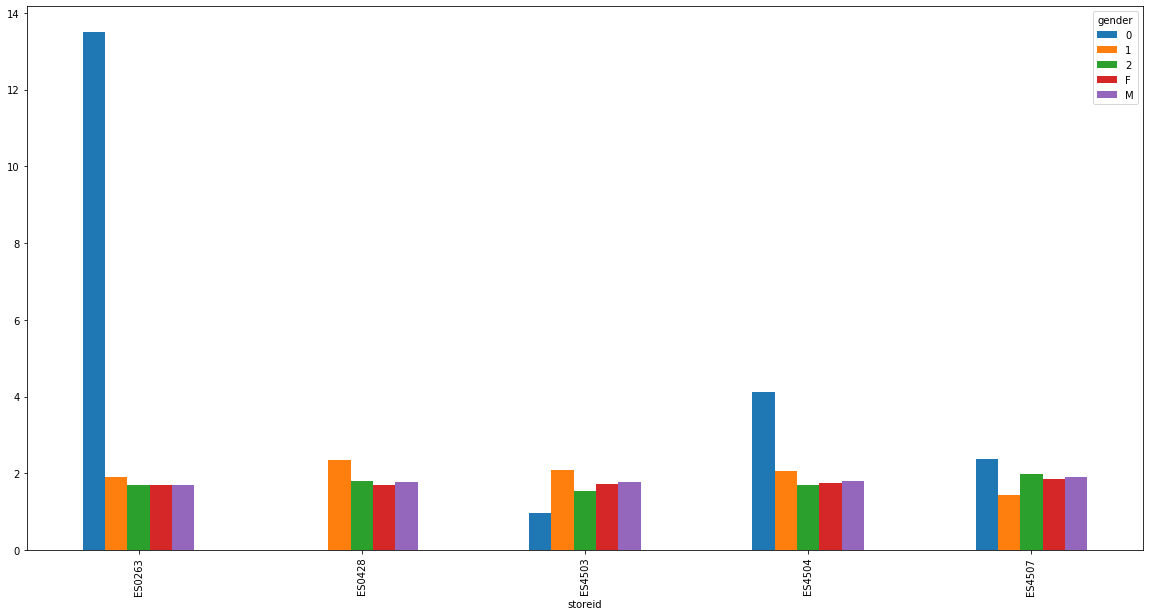

In [148]:
df = data.groupby(['storeid','gender'])['extendedamount'].mean().unstack().reset_index()\
.plot.bar(x = 'storeid', y = ['0', '1','2','F','M'])

## PROMEDIO DE COMPRA POR TIENDA Y DÍA DE LA SEMANA

### En general, el gasto promedio por día de la semana en cada tienda es igual

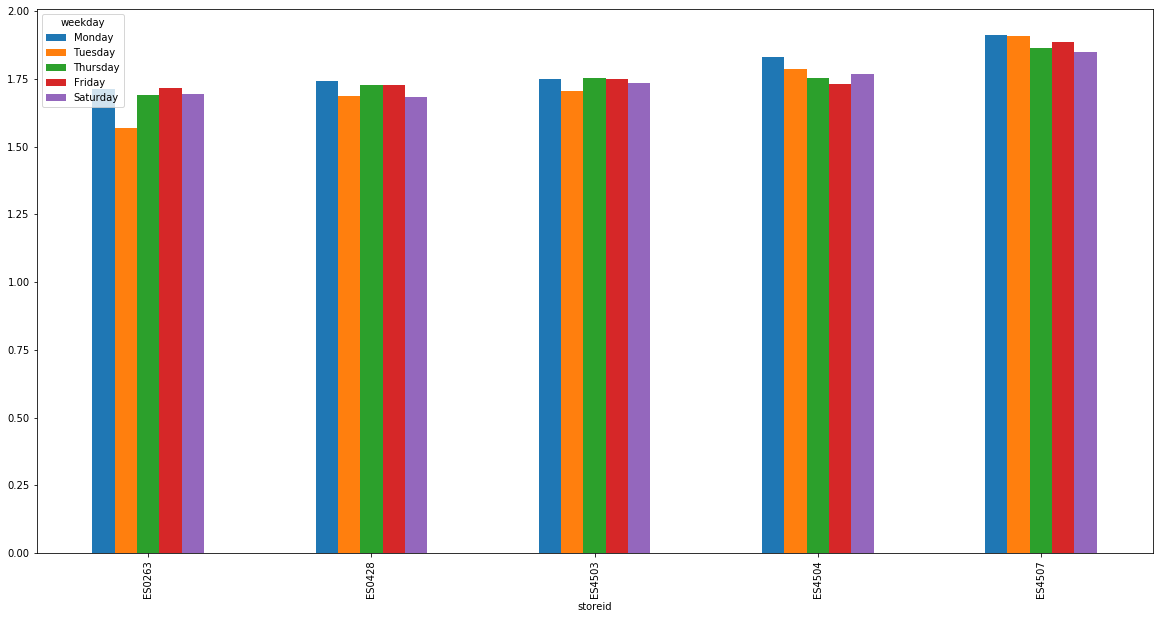

In [150]:
df = data.groupby(['storeid','weekday'])['extendedamount'].mean().unstack().reset_index()\
.plot.bar(x = 'storeid', y = ['Monday', 'Tuesday','Thursday','Friday','Saturday'])

In [151]:
data = data.merge(dF_products, on="productid", how = 'inner')
data.head()

,customerid,isocountrycode_x,regularstoreid,registrationdate,unregistrationdate,gender,age,zipcode,ticketid,linenumber,...,familyname,categoryname,subcategoryname,merchandisefamily,weightproduct,scaleproduct,vatdescription,vatrate,agelimit,hwgdescription
0,77340000025940422,ES,ES0263,2017-11-25,NaN,F,3,50014,1000450762019032163010,7,...,HIGIENE BUCAL,DENTIFRICOS,DENTIFRICOS,"Higiene bucal, afeitado",False,False,Ordinario,21.0,Keines,Surtido NF
1,77340000025636133,ES,ES4504,2017-11-20,NaN,NaN,9,NaN,10004504320190225336773,9,...,HIGIENE BUCAL,DENTIFRICOS,DENTIFRICOS,"Higiene bucal, afeitado",False,False,Ordinario,21.0,Keines,Surtido NF
2,77340000025636133,ES,ES4504,2017-11-20,NaN,NaN,9,NaN,10004504320190314342322,14,...,HIGIENE BUCAL,DENTIFRICOS,DENTIFRICOS,"Higiene bucal, afeitado",False,False,Ordinario,21.0,Keines,Surtido NF
3,77340000025633029,ES,ES0263,2017-11-20,NaN,F,2,50059,1000450762019032163070,6,...,HIGIENE BUCAL,DENTIFRICOS,DENTIFRICOS,"Higiene bucal, afeitado",False,False,Ordinario,21.0,Keines,Surtido NF
4,77340000025633029,ES,ES0263,2017-11-20,NaN,F,2,50059,10000263520190314647,40,...,HIGIENE BUCAL,DENTIFRICOS,DENTIFRICOS,"Higiene bucal, afeitado",False,False,Ordinario,21.0,Keines,Surtido NF


## CAREGORÍAS DE PRODUCTOS VENDIDOS

### LOS PRODUCTOS MÁS VENDIDOS SON LOS FRESCOS PERECEDEROS 

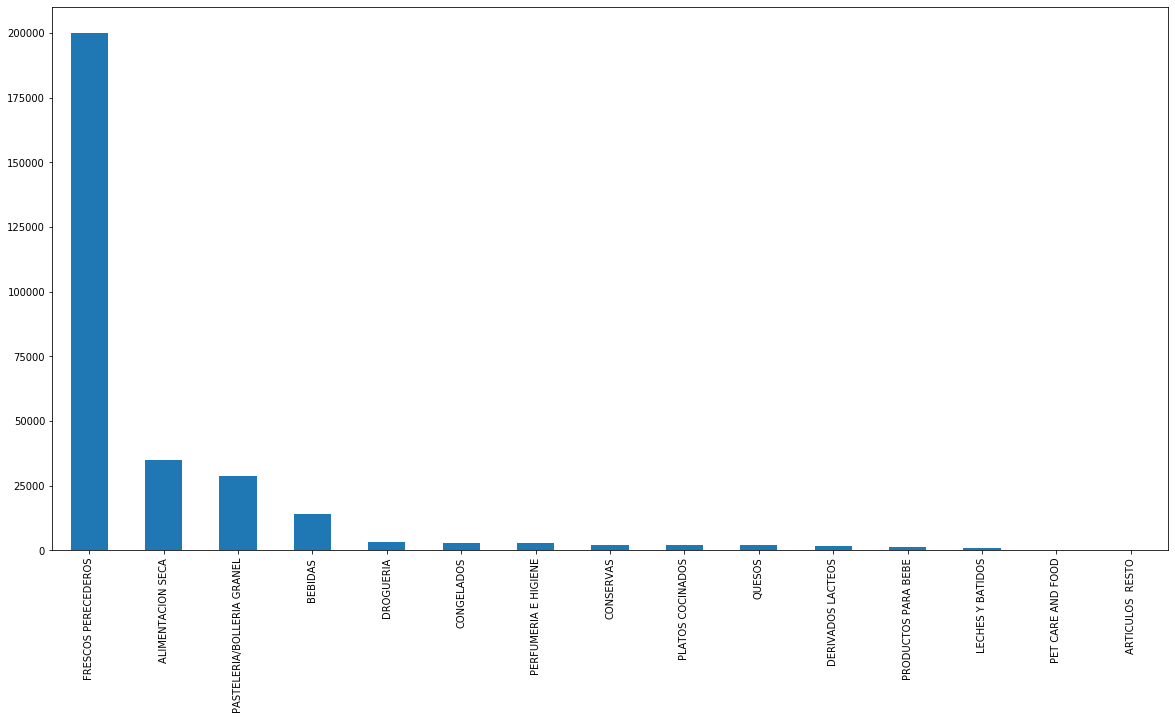

In [156]:
plt.rcParams['figure.figsize'] =[20, 10]
pd.value_counts(data['sectionname']).plot.bar()

### LOS PRODUCTOS MÁS VENDIDOS SON LAS VERDURAS/ HORTALIZAS

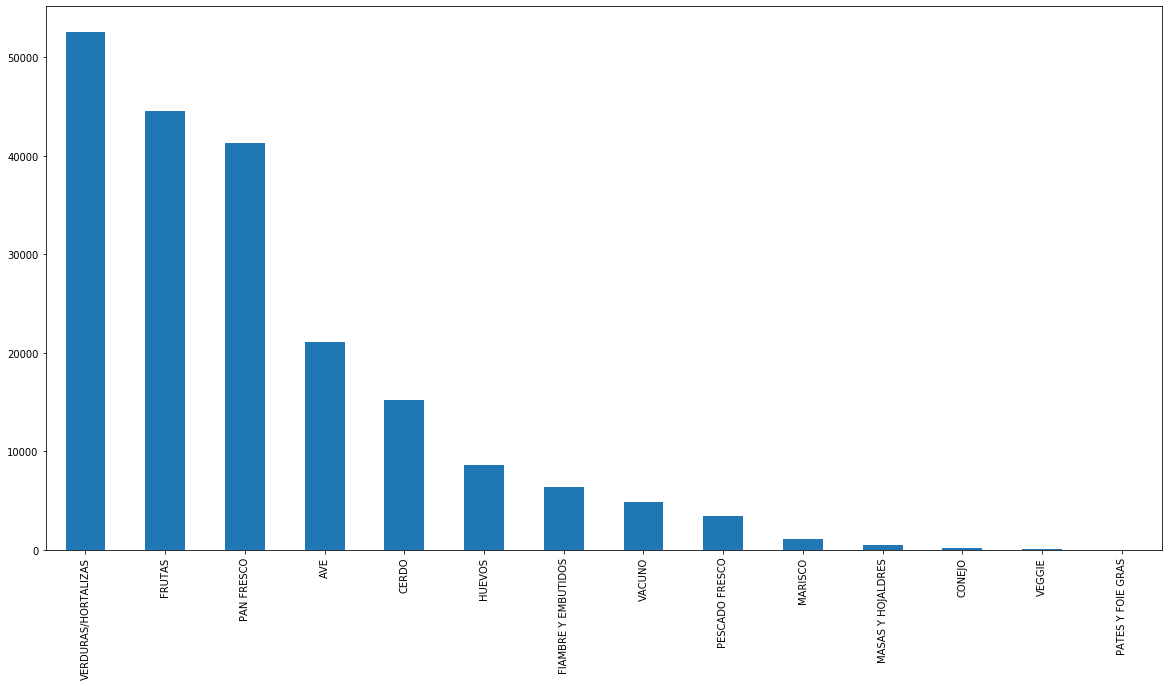

In [168]:
plt.rcParams['figure.figsize'] =[20, 10]
pd.value_counts(data[(data.sectionname == 'FRESCOS PERECEDEROS')]['categoryname']).plot.bar()

### CATEGORÍAS DE PRODUCTOS MÁS VENDIDOS POR GÉNERO

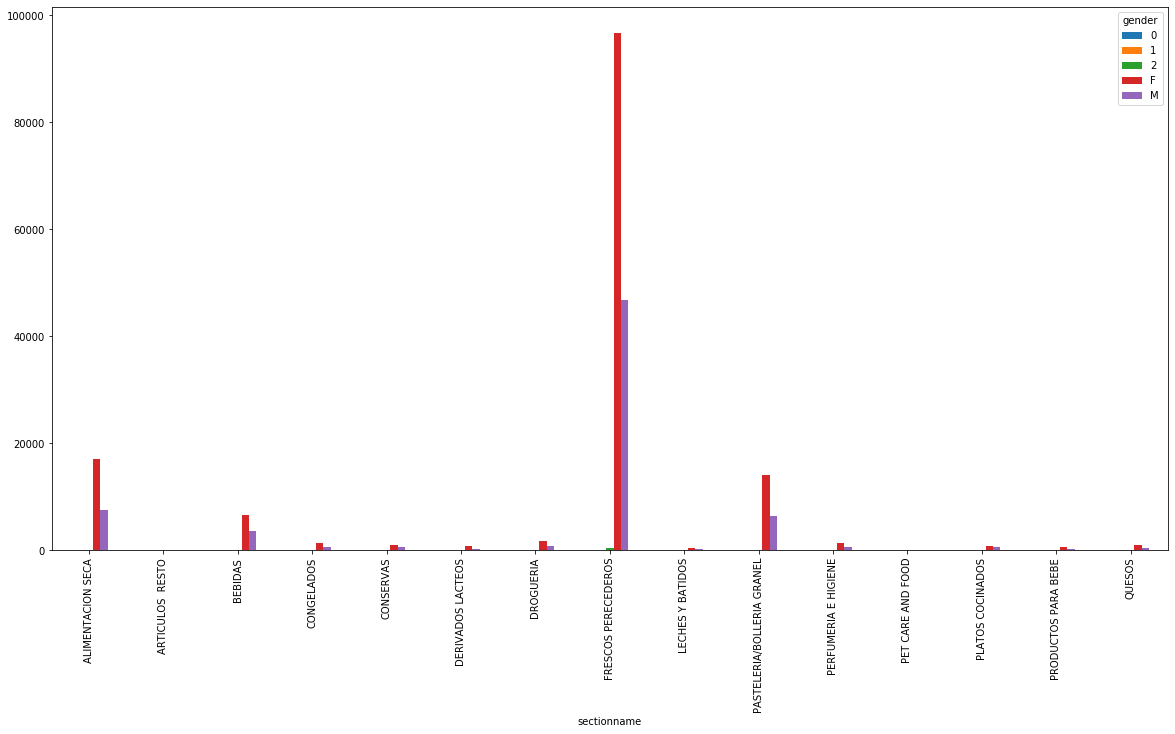

In [171]:
data.groupby(['sectionname','gender'])['customerid'].count().unstack().reset_index()\
.plot.bar(x = 'sectionname', y = ['0', '1','2','F','M'])

### PRODUCTOS ESPECÍFICOS DE PRODUCTOS MÁS VENDIDOS POR GÉNERO

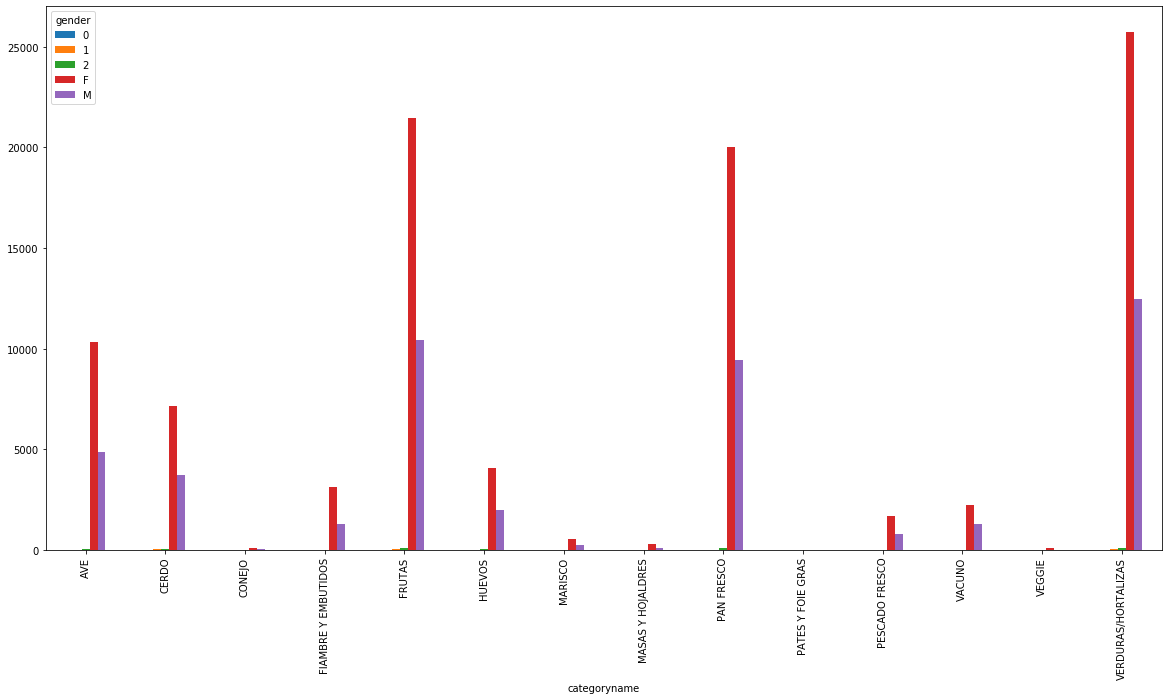

In [173]:
data[(data.sectionname == 'FRESCOS PERECEDEROS')].groupby(['categoryname','gender'])['customerid'].count().unstack().reset_index()\
.plot.bar(x = 'categoryname', y = ['0', '1','2','F','M'])

### CATEGORÍAS DE PRODUCTOS MÁS VENDIDOS POR DÍA DE LA SEMANA

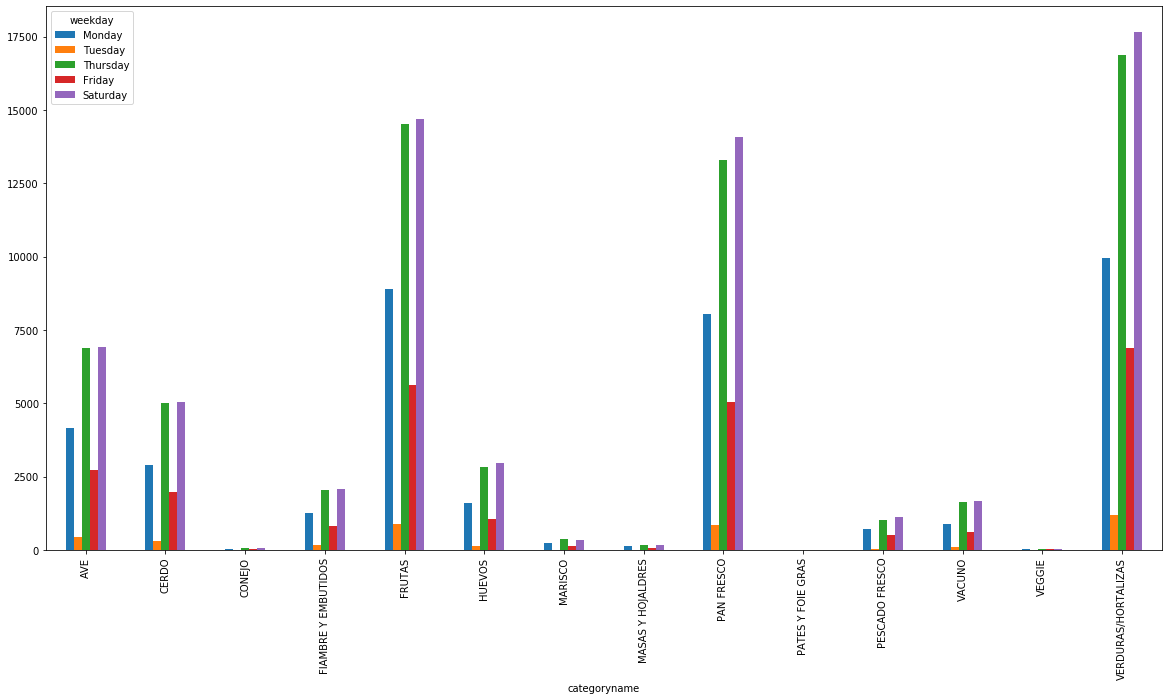

In [174]:
data[(data.sectionname == 'FRESCOS PERECEDEROS')].groupby(['categoryname','weekday'])['customerid'].count().unstack().reset_index()\
.plot.bar(x = 'categoryname', y = ['Monday', 'Tuesday','Thursday','Friday','Saturday'])

### CATEGORIAS DE PRODUCTOS MÁS VENDIDOS POR EDADES

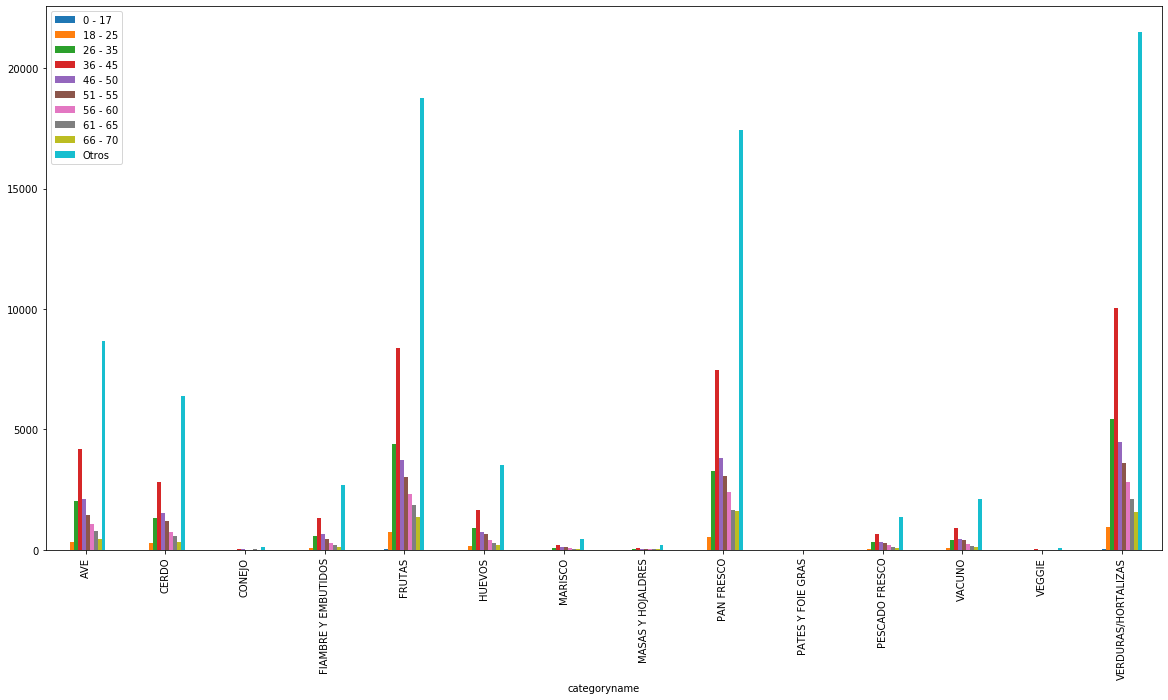

In [176]:
ax = data[(data.sectionname == 'FRESCOS PERECEDEROS')].groupby(['categoryname','age'])['customerid'].count().unstack().reset_index()\
.plot.bar(x = 'categoryname', y = [0,1,2,3,4,5,6,7,8,9])

ax.legend(["0 - 17", "18 - 25","26 - 35","36 - 45","46 - 50","51 - 55","56 - 60","61 - 65","66 - 70","Otros"]);